In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
data = pd.read_json('combined.json', lines=True)
data.head()
len(data)
#data.contents

data.contents[1]

'  WASHINGTON – North Carolina’s Waccamaw River watershed will benefit from a $1 million restitution order from a federal court, funding environmental projects to acquire and preserve wetlands in an area damaged by illegal releases of wastewater from a corporate hog farm, announced Ignacia S. Moreno, Assistant Attorney General of the Justice Department’s Environment and Natural Resources Division; U.S. Attorney for the Eastern District of North Carolina Thomas G. Walker; Director Greg McLeod from the North Carolina State Bureau of Investigation; and Camilla M. Herlevich, Executive Director of the North Carolina Coastal Land Trust.   Freedman Farms Inc. was sentenced in February 2012 to five years of probation and ordered to pay $1.5 million in fines, restitution and community service payments for violating the Clean Water Act when it discharged hog waste into a stream that leads to the Waccamaw River.\xa0 William B. Freedman, president of Freedman Farms, was sentenced to six months in 

In [ ]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
ps = PorterStemmer() 
   
#print(data.contents[1]) 
for i in range(len(data.contents)):
   # data.contents[i]=ps.stem(data.contents[i])   
    data.contents[i]=ps.stem(data.contents[i])
   # print(data.contents[i]) 

In [6]:
tfidf = TfidfVectorizer(min_df = 4,max_df = 0.93,max_features = 8000,stop_words = 'english')
tfidf.fit(data.contents)
text = tfidf.transform(data.contents)

from sklearn.preprocessing import normalize
text=normalize(text)
print(text)
aa=text.toarray()
#print(data.contents.shape())

#print(tfidf.get_feature_names())

  (0, 7978)	0.011888958324422286
  (0, 7970)	0.03650858067891951
  (0, 7969)	0.004753709760899653
  (0, 7956)	0.014744901222852921
  (0, 7951)	0.012641793573493957
  (0, 7928)	0.018438518428109337
  (0, 7927)	0.0067777116514034005
  (0, 7903)	0.014827218236272857
  (0, 7826)	0.014148404252696577
  (0, 7792)	0.04205816158738995
  (0, 7791)	0.012368399838839195
  (0, 7733)	0.030947225825581275
  (0, 7732)	0.019689561715262077
  (0, 7710)	0.014841169350539876
  (0, 7706)	0.013039549417313877
  (0, 7663)	0.025335967498029598
  (0, 7646)	0.03099608498312408
  (0, 7612)	0.02100472447076996
  (0, 7591)	0.017291487722307583
  (0, 7584)	0.018164254903563225
  (0, 7558)	0.005058086292321236
  (0, 7525)	0.1598684566317709
  (0, 7510)	0.011863972049269483
  (0, 7474)	0.015660644234016422
  (0, 7446)	0.03221237146894063
  :	:
  (13086, 465)	0.0372373817288734
  (13086, 464)	0.02383022687907245
  (13086, 462)	0.061617621185475896
  (13086, 452)	0.024877657926892602
  (13086, 432)	0.02956119585504841

In [7]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)

tfidf.fit(data.contents)
text = tfidf.transform(data.contents)

from sklearn.preprocessing import normalize
text=normalize(text)
aa=text.toarray()
#print(data.contents.shape())
#print(data)
#print(tfidf.get_feature_names())

In [8]:
for i in aa:
    print(i)

[0.        0.0053928 0.        ... 0.        0.        0.       ]
[0.         0.02567062 0.         ... 0.         0.         0.        ]
[0.         0.03816454 0.         ... 0.         0.         0.        ]
[0.         0.01424294 0.         ... 0.         0.         0.        ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.02738009 0.         0.         ... 0.         0.         0.        ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.         0.01865383 0.         ... 0.         0.         0.        ]
[0.         0.01124267 0.         ... 0.         0.         0.        ]
[0.         0.01474151 0.         ... 0.         0.         0.        ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.         0.02034546 0.         ... 0.         0.         0.        

Fit 2 clusters
[12143.00247595784]
Fit 4 clusters
[12143.00247595784, 11792.624108884092]
Fit 6 clusters
[12143.00247595784, 11792.624108884092, 11658.546002609062]
Fit 8 clusters
[12143.00247595784, 11792.624108884092, 11658.546002609062, 11592.13409731845]
Fit 10 clusters
[12143.00247595784, 11792.624108884092, 11658.546002609062, 11592.13409731845, 11451.061783350244]
Fit 12 clusters
[12143.00247595784, 11792.624108884092, 11658.546002609062, 11592.13409731845, 11451.061783350244, 11316.8916580119]
Fit 14 clusters
[12143.00247595784, 11792.624108884092, 11658.546002609062, 11592.13409731845, 11451.061783350244, 11316.8916580119, 11114.739026421477]
Fit 16 clusters
[12143.00247595784, 11792.624108884092, 11658.546002609062, 11592.13409731845, 11451.061783350244, 11316.8916580119, 11114.739026421477, 11101.84729213619]
Fit 18 clusters
[12143.00247595784, 11792.624108884092, 11658.546002609062, 11592.13409731845, 11451.061783350244, 11316.8916580119, 11114.739026421477, 11101.847292136

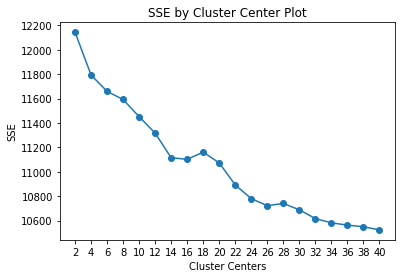

In [9]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        print(sse)
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 40)

In [10]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)
print(clusters)
for i in clusters:
    print(i)

[1 9 9 ... 1 1 1]
1
9
9
9
9
8
12
1
1
1
12
8
1
8
2
1
1
6
2
1
1
8
4
4
8
8
1
7
11
8
4
8
12
8
8
8
1
4
8
1
8
1
8
1
1
6
6
1
1
1
1
1
4
1
4
4
1
1
2
6
1
1
1
1
1
7
1
12
1
10
1
1
1
1
8
10
12
12
8
1
6
6
6
6
6
6
1
8
1
6
4
4
4
12
1
2
12
10
1
1
9
9
9
9
11
1
1
1
1
1
1
1
9
9
0
1
1
7
9
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
4
1
1
2
2
2
2
1
2
2
2
9
2
4
2
2
1
2
0
0
0
2
0
1
2
2
2
0
2
2
2
2
2
12
1
2
12
2
2
12
2
2
2
0
0
0
2
2
1
2
2
2
2
2
12
1
2
2
0
0
12
2
2
2
2
2
2
2
2
2
2
2
1
1
2
1
9
9
7
7
7
7
7
7
7
7
7
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
13
2
2
2
2
2
2
12
12
1
2
2
2
2
2
2
2
2
2
2
2
13
2
13
13
2
2
2
2
2
2
2
2
2
2
2
2
2
13
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
9
1
9
1
0
9
2
2
2
9
9
2
2
0
2
0
0
1
1
12
1
9
1
4
1
1
1
1
1
1
1
1
8
7
1
1
1
1
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
8
8
1
1
1
1
1
8
1
1
1
1
1
1
1
4
1
1
4
1
1
8
8
8
7
1
1
4
1
1
9
9
6
6
6
4
9
4
1
1
1
1
9
4
1
1
1
1
1
4
4
4
12
4
9
9
1
1
1
1
12
1
1
12
1
1
1
1
1
7
7
7
1
7
7
7
7
7
7
7
7
7
7
7
7
1
9
1
9
9
1
12
1
1
1
9
9
9
4
2
4
4
10
1
1
1
1
0
0
0
0
1
1

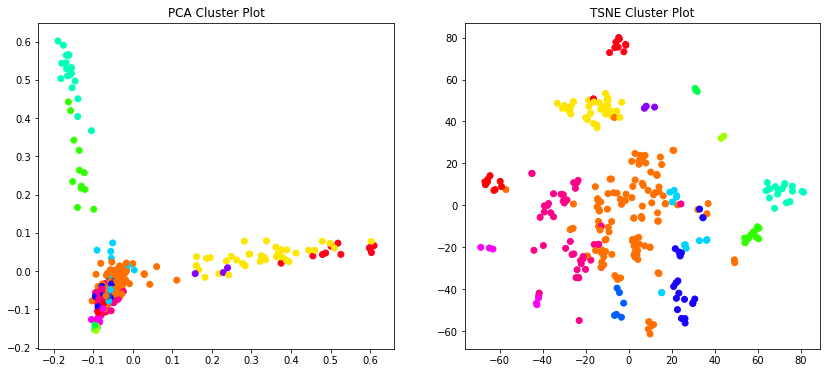

In [7]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [8]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 5)


Cluster 0
project,exploitation,childhood,pornography,child

Cluster 1
indictment,department,criminal,district,attorney

Cluster 2
false,income,returns,irs,tax

Cluster 3
immigration,ina,employment,discrimination,osc

Cluster 4
settlement,medicare,claims,care,health

Cluster 5
disabilities,hud,discrimination,fair,housing

Cluster 6
care,hhs,fraud,health,medicare

Cluster 7
bid,auctions,fraud,financial,antitrust

Cluster 8
aka,murder,racketeering,members,gang

Cluster 9
air,water,environmental,epa,settlement

Cluster 10
account,tax,swiss,bank,accounts

Cluster 11
election,rights,disabilities,voting,ada

Cluster 12
attorney,justice,department,civil,rights

Cluster 13
injunction,complaint,customers,returns,tax


In [5]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

clustecr = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='ward')

model=clustecr.fit_predict(aa)
print("bb")
print(clustecr.labels_.size)
print(clustecr.labels_)
for i in clustecr.labels_:
    print(i)

NameError: name 'aa' is not defined

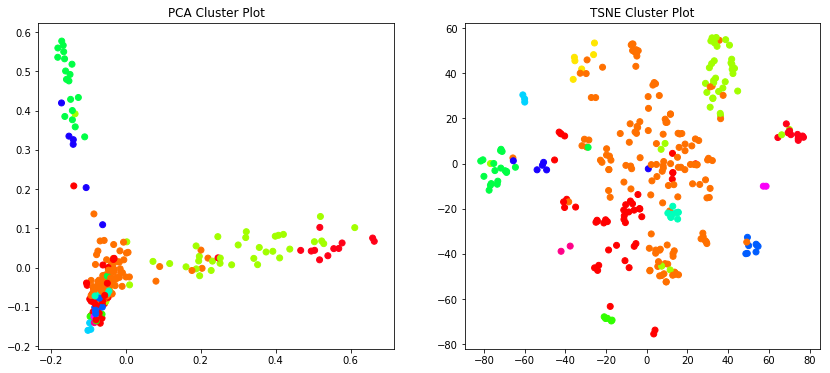

In [10]:
plot_tsne_pca(text, clustecr.labels_)

In [11]:
get_top_keywords(text, clustecr.labels_, tfidf.get_feature_names(), 5)


Cluster 0
civil,attorney,rights,justice,department

Cluster 1
department,indictment,criminal,district,attorney

Cluster 2
air,oil,water,environmental,epa

Cluster 3
false,income,returns,irs,tax

Cluster 4
agreement,514,access,disabilities,ada

Cluster 5
hhs,care,fraud,health,medicare

Cluster 6
murder,abt,racketeering,members,gang

Cluster 7
disabilities,hud,discrimination,fair,housing

Cluster 8
project,exploitation,childhood,pornography,child

Cluster 9
false,medicare,claims,care,health

Cluster 10
bid,real,estate,foreclosure,auctions

Cluster 11
immigration,ina,employment,discrimination,osc

Cluster 12
observers,voters,rights,election,voting

Cluster 13
injunction,complaint,customers,returns,tax


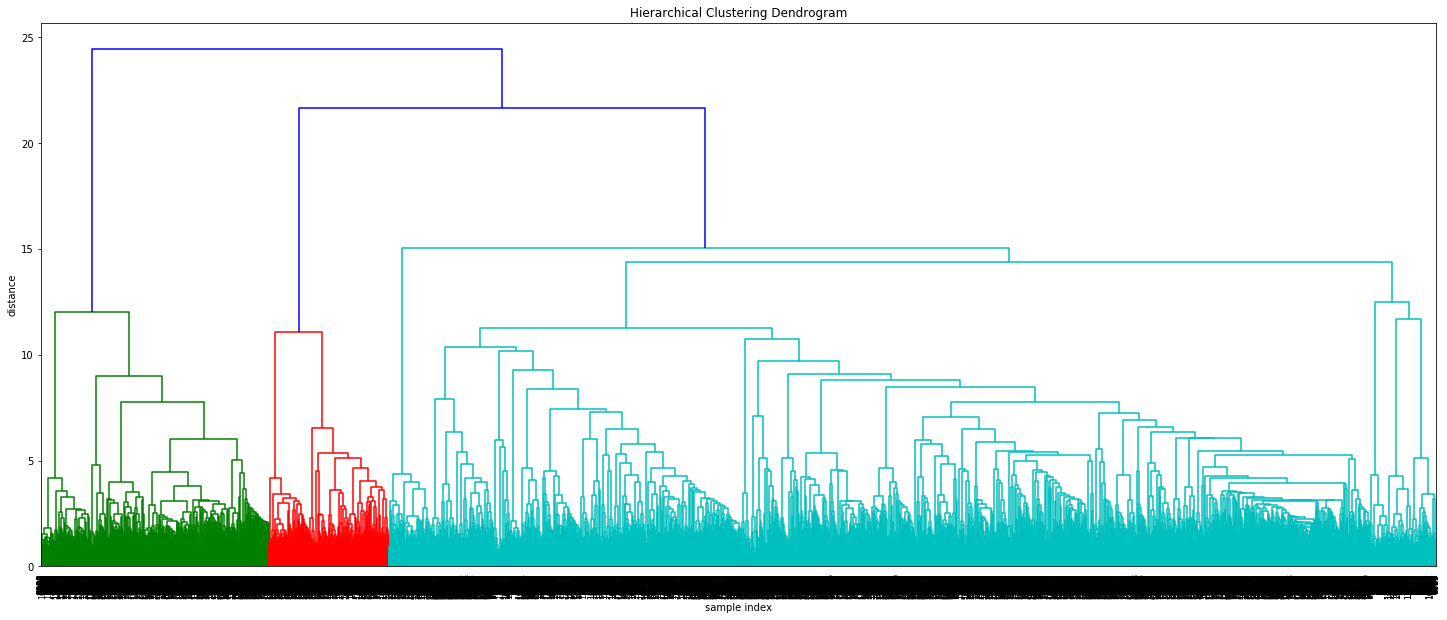

xc


In [12]:
from sklearn.cluster import AgglomerativeClustering 
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np 
  
Z=linkage(aa,'ward')
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    p=14,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()
print("xc")

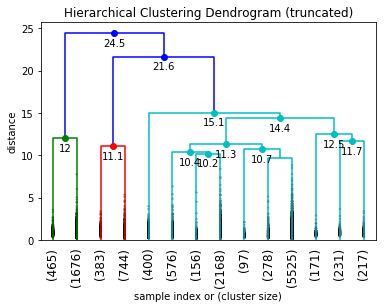

In [13]:

def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=14,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()